<a href="https://colab.research.google.com/github/felipemunarol/Statistic/blob/main/src/de_para_conj_unid_med_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As unidades geograficas sao consideradas como as areas em que sao divididos um territorio (neste presente trabalho). Para serem analisadas as condicoes climaticas nestas unidades é necessario que sejam coletadas
as informacoes de medicoes meteorologicas nessas regioes. No brasil, o Immet é um dos orgãos de esfera federal que realizam essas medições. As medicoes são realizadas por unidades meteorologicas que estao presentes
no territorio brasileiro em diferentes areas. Para se ter uma métrica meteorológica em cada unidade geográfica é necessario portanto verificar as medidas que foram relizadas nestas regioes. Dependendo da divisao do território,
em contrapartida é sabido que nem todas as suas partes apresentam unidades de medições, dentro dos seus limites. Dessa forma, considerando a ausência de informações meteorológicas em todas as unidades geográficas e que estas medições se assemelham mais em
regiões que estão próximas, na ausencia destas medidas em um destes territorios a melhor informacao é a de seus territorios mais proximos.

In [ ]:
! pip install geocoder
! pip install geopandas

In [ ]:
import csv
import ast
import pandas as pd
import os
import geocoder
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

from geopy.geocoders import Nominatim

# Conecta o serviço com o Drive
from google.colab import drive
drive.mount('/content/drive')

# Root Path
os.environ['ROOT'] = '/content/drive/MyDrive/Mestrado/Ordens_servico/'
base_path = os.environ.get("ROOT")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
year = 2022

In [ ]:
# Raiz
! ls '$ROOT/Ordens_servico/Dados'

ls: cannot access '$ROOT/Ordens_servico/Dados': No such file or directory


## Dados Meteorologicos

In [ ]:
# Leitura dos dados entre processados
meteorologia_result = pd.read_csv(base_path + "Ordens_servico/meteorologia_raw_{}.csv".format(year))

## Inclui os dados de conjuntos nas informacoes meteorologicas

In [ ]:
meteorologia_result

,Unnamed: 0,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(Â°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(Â°C)","TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)","TEMPERATURA MINIMA, DIARIA (AUT)(Â°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)",Unnamed: 12,unidademedicao,latitude,longitude
0,0,2022-01-01,17.8,884.795833,17.975000,21.8,19.079167,18.3,93.416667,82.0,11.4,2.254167,NaN,BRAZLANDIA,-15.599722,-48.131111
1,1,2022-01-02,20.2,886.004167,18.212500,24.5,19.725000,18.1,91.166667,72.0,12.1,2.329167,NaN,BRAZLANDIA,-15.599722,-48.131111
2,2,2022-01-03,7.6,886.141667,18.295833,25.0,20.458333,18.6,87.750000,66.0,8.2,1.783333,NaN,BRAZLANDIA,-15.599722,-48.131111
3,3,2022-01-04,16.4,884.950000,18.250000,24.4,20.291667,18.3,88.458333,67.0,8.7,2.058333,NaN,BRAZLANDIA,-15.599722,-48.131111
4,4,2022-01-05,0.8,884.762500,17.770833,27.1,21.816667,17.9,79.458333,48.0,8.7,2.625000,NaN,BRAZLANDIA,-15.599722,-48.131111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209136,361,2022-12-28,6.8,933.137500,16.104167,25.5,20.670833,17.9,77.125000,49.0,12.3,3.954167,NaN,CHAPECO,-27.085311,-52.635711
209137,362,2022-12-29,0.0,936.412500,11.004167,28.9,21.879167,14.1,52.666667,27.0,9.0,2.587500,NaN,CHAPECO,-27.085311,-52.635711
209138,363,2022-12-30,0.0,936.808696,10.913043,30.6,24.182609,16.7,44.565217,29.0,7.3,2.565217,NaN,CHAPECO,-27.085311,-52.635711
209139,364,2022-12-31,0.0,936.287500,14.904167,32.4,25.983333,20.3,52.458333,33.0,11.6,2.412500,NaN,CHAPECO,-27.085311,-52.635711


In [ ]:
# We have 574 measuring units
unidades_de_medicao = meteorologia_result.drop_duplicates("unidademedicao")[["unidademedicao", "latitude", "longitude"]]
unidades_de_medicao

,unidademedicao,latitude,longitude
0,BRAZLANDIA,-15.599722,-48.131111
366,AGUAS EMENDADAS,-15.596491,-47.625801
732,MARIANOPOLIS DO TO,-9.576389,-49.723333
1098,CAMPOS LINDOS,-8.154722,-46.639444
1464,ARAGUATINS,-5.643611,-48.111944
...,...,...,...
207311,TANGARA DA SERRA,-14.650000,-57.431667
207677,CUIABA,-15.559295,-56.062951
208043,CAMPOS NOVOS,-27.388611,-51.215833
208409,CAMBARA DO SUL,-29.049167,-50.149722


In [ ]:
# Transform the coodinate to a point (lat, long)
unidades_de_medicao["point"] = gpd.GeoSeries.from_xy(unidades_de_medicao.longitude, unidades_de_medicao.latitude)
unidades_de_medicao["point"]

0         POINT (-48.13111 -15.59972)
366       POINT (-47.62580 -15.59649)
732        POINT (-49.72333 -9.57639)
1098       POINT (-46.63944 -8.15472)
1464       POINT (-48.11194 -5.64361)
                     ...             
207311    POINT (-57.43167 -14.65000)
207677    POINT (-56.06295 -15.55930)
208043    POINT (-51.21583 -27.38861)
208409    POINT (-50.14972 -29.04917)
208775    POINT (-52.63571 -27.08531)
Name: point, Length: 574, dtype: geometry

<Axes: >

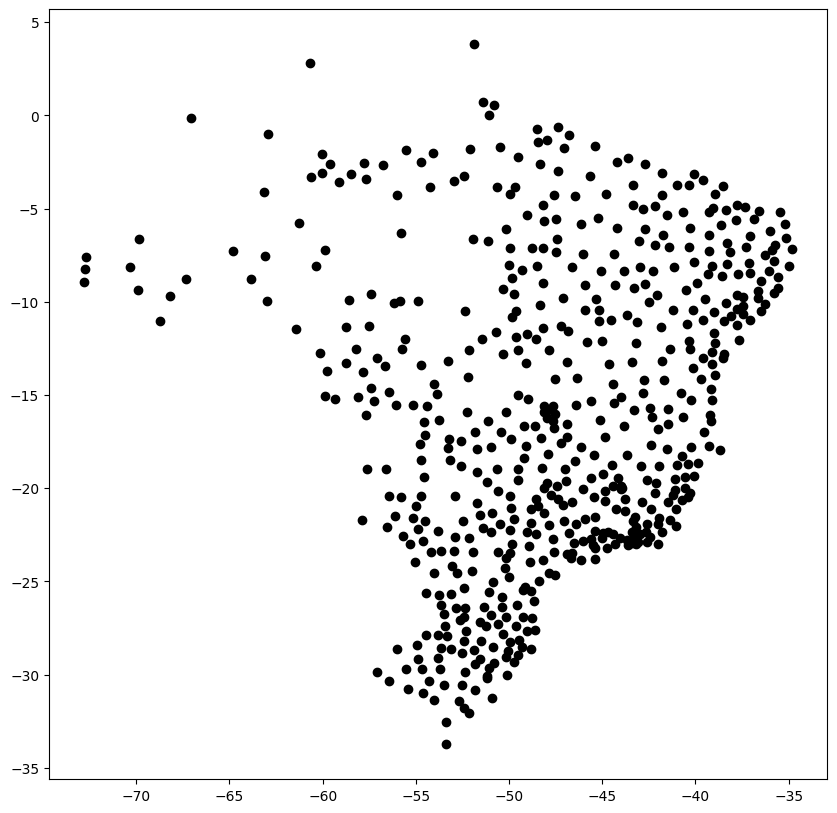

In [ ]:
# Plot the mensure units
gdf = gpd.GeoDataFrame(
    unidades_de_medicao, geometry=unidades_de_medicao["point"],
)
gdf.plot(figsize=(20,10), color='grey')

In [ ]:
# Read the geografic units data. (information about the geographic territories)
de_para_conj = gpd.read_file(base_path + "Ordens_servico/de_para_und_cons_.json")
de_para_conj

,Name,Unnamed: 0,IdeConjUndConsumidoras,DscConjUndConsumidoras,MUN_MINIMUM_BOUND_RADIO,MUN_NUMBER_OF_BOUNDARYS,AREA,LENGTH,geometry
0,12525,110418,12525.0,CAMAQUÃ,0.561293,149,0.438325,3.710852,"POLYGON Z ((-51.50051 -30.96237 0.00000, -51.3..."
1,16509,325886,16509.0,Guaporé,0.320427,531,0.122356,3.512604,"POLYGON Z ((-52.02439 -28.74837 0.00000, -51.9..."
2,15630,5815,15630.0,DOURADOS DAS NAÇÕES,0.194285,516,0.043815,1.150031,"POLYGON Z ((-54.67014 -22.17814 0.00000, -54.6..."
3,13593,111517,13593.0,TIETE,0.161835,440,0.029765,1.444788,"POLYGON Z ((-47.80600 -22.88300 0.00000, -47.7..."
4,15044,4255,15044.0,TERRA NOVA AEREO,0.022936,408,0.000660,0.298677,"POLYGON Z ((-43.27286 -22.87173 0.00000, -43.2..."
...,...,...,...,...,...,...,...,...,...
2917,16198,6992,16198.0,MATOES,0.538188,539,0.305642,3.259529,"POLYGON Z ((-43.19809 -5.27831 0.00000, -43.18..."
2918,12907,110762,12907.0,EMBU GUAÇU,0.126946,90,0.015497,0.764108,"POLYGON Z ((-46.78748 -23.74952 0.00000, -46.7..."
2919,12863,429525,12863.0,MIMOSO,0.486715,3552,0.490099,3.317999,"POLYGON Z ((-53.62570 -20.45397 0.00000, -53.6..."
2920,13771,327562,13771.0,RODEIRO,0.126113,77,0.019781,0.775100,"POLYGON Z ((-42.89234 -21.22334 0.00000, -42.9..."


AttributeError: ignored

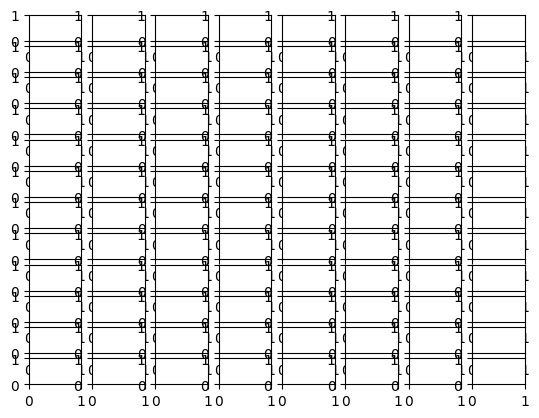

In [ ]:
ax, fig = plt.subplots(12, 8)


de_para_conj.plot(ax=ax)
gdf.plot(figsize=(20,10), color='grey', ax=ax)

For each polygon, check if have a unit inside, if not get the closer unit

In [ ]:
# Set the lists the contain the mensuring units points (lat, long)
points = unidades_de_medicao.point
units_med = unidades_de_medicao.unidademedicao

In [ ]:
# Test a case for one territory unit (test if the meteorology mensuring unit is in the territory unit)
unidades_de_medicao["point"].iloc[0].intersects(de_para_conj["geometry"].iloc[4])

False

In [ ]:
# Test the distance return
polygons[4].distance(unidades_de_medicao["point"].iloc[0])

8.71847543164332

In [ ]:
# Function that for each polygon, check if have a unit inside, if not, get the closer unit

def ident_mensu_unit(serie):
  polygon = serie.geometry
  ds_conj = serie.DscConjUndConsumidoras

  list_units = []
  distance = 0
  for point, unit_med in zip(points, units_med):
    # check if the point intercept the polygon
    if point.intersects(polygon):
      print("unit founded")
      list_units.append(unit_med)

  # if not founded mensuring unit (point), check the closer one
  if not list_units:
    print("unit not founded")
    # get distances
    distance_point = {}
    for point, unit_med in zip(points, units_med):
      distance_point[unit_med] = polygon.distance(point)
    # get the unit with the min distance
    list_units.append(min(distance_point, key=distance_point.get))
    distance = distance_point[min(distance_point, key=distance_point.get)]

  return list_units, distance

de_para_conj[["units_med", "distance"]] = de_para_conj.apply(ident_mensu_unit, axis=1, result_type="expand")

unit founded
unit founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit founded
unit not founded
unit founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit founded
unit founded
unit founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded
unit not founded

In [ ]:
de_para_conj

,Name,Unnamed: 0,IdeConjUndConsumidoras,DscConjUndConsumidoras,MUN_MINIMUM_BOUND_RADIO,MUN_NUMBER_OF_BOUNDARYS,AREA,LENGTH,geometry,units_med,distance
0,12525,110418,12525.0,CAMAQUÃ,0.561293,149,0.438325,3.710852,"POLYGON Z ((-51.50051 -30.96237 0.00000, -51.3...",[CAMAQUA],0.000000
1,16509,325886,16509.0,Guaporé,0.320427,531,0.122356,3.512604,"POLYGON Z ((-52.02439 -28.74837 0.00000, -51.9...",[SERAFINA CORREA],0.000000
2,15630,5815,15630.0,DOURADOS DAS NAÇÕES,0.194285,516,0.043815,1.150031,"POLYGON Z ((-54.67014 -22.17814 0.00000, -54.6...",[DOURADOS],0.125832
3,13593,111517,13593.0,TIETE,0.161835,440,0.029765,1.444788,"POLYGON Z ((-47.80600 -22.88300 0.00000, -47.7...",[PIRACICABA],0.226205
4,15044,4255,15044.0,TERRA NOVA AEREO,0.022936,408,0.000660,0.298677,"POLYGON Z ((-43.27286 -22.87173 0.00000, -43.2...",[RIO DE JANEIRO - VILA MILITAR],0.107783
...,...,...,...,...,...,...,...,...,...,...,...
2917,16198,6992,16198.0,MATOES,0.538188,539,0.305642,3.259529,"POLYGON Z ((-43.19809 -5.27831 0.00000, -43.18...",[ANGICAL DO PIAUI],0.330930
2918,12907,110762,12907.0,EMBU GUAÇU,0.126946,90,0.015497,0.764108,"POLYGON Z ((-46.78748 -23.74952 0.00000, -46.7...",[SAO PAULO - INTERLAGOS],0.095015
2919,12863,429525,12863.0,MIMOSO,0.486715,3552,0.490099,3.317999,"POLYGON Z ((-53.62570 -20.45397 0.00000, -53.6...",[AGUA CLARA],0.483630
2920,13771,327562,13771.0,RODEIRO,0.126113,77,0.019781,0.775100,"POLYGON Z ((-42.89234 -21.22334 0.00000, -42.9...",[MURIAE],0.308235


In [ ]:
# Check quantity of geographic territorys without unit (the inference was made)
de_para_conj[de_para_conj["distance"] != 0]

,Name,Unnamed: 0,IdeConjUndConsumidoras,DscConjUndConsumidoras,MUN_MINIMUM_BOUND_RADIO,MUN_NUMBER_OF_BOUNDARYS,AREA,LENGTH,geometry,units_med,distance
2,15630,5815,15630.0,DOURADOS DAS NAÇÕES,0.194285,516,0.043815,1.150031,"POLYGON Z ((-54.67014 -22.17814 0.00000, -54.6...",[DOURADOS],0.125832
3,13593,111517,13593.0,TIETE,0.161835,440,0.029765,1.444788,"POLYGON Z ((-47.80600 -22.88300 0.00000, -47.7...",[PIRACICABA],0.226205
4,15044,4255,15044.0,TERRA NOVA AEREO,0.022936,408,0.000660,0.298677,"POLYGON Z ((-43.27286 -22.87173 0.00000, -43.2...",[RIO DE JANEIRO - VILA MILITAR],0.107783
5,13749,430465,13749.0,ASTOLFO DUTRA,0.146582,163,0.032168,1.215790,"POLYGON Z ((-42.88897 -21.24540 0.00000, -42.8...",[CORONEL PACHECO],0.268767
6,16317,538286,16317.0,Patos de Minas 1,0.372569,1578,0.227109,3.213144,"POLYGON Z ((-46.51046 -18.11331 0.00000, -46.5...",[PATOS DE MINAS],0.009565
...,...,...,...,...,...,...,...,...,...,...,...
2916,14096,540268,14096.0,PARELHAS,0.267021,83,0.121459,1.904170,"POLYGON Z ((-36.52071 -6.61062 0.00000, -36.51...",[CAICO],0.147221
2917,16198,6992,16198.0,MATOES,0.538188,539,0.305642,3.259529,"POLYGON Z ((-43.19809 -5.27831 0.00000, -43.18...",[ANGICAL DO PIAUI],0.330930
2918,12907,110762,12907.0,EMBU GUAÇU,0.126946,90,0.015497,0.764108,"POLYGON Z ((-46.78748 -23.74952 0.00000, -46.7...",[SAO PAULO - INTERLAGOS],0.095015
2919,12863,429525,12863.0,MIMOSO,0.486715,3552,0.490099,3.317999,"POLYGON Z ((-53.62570 -20.45397 0.00000, -53.6...",[AGUA CLARA],0.483630


In [ ]:
# Transform all geographic territorys with more than one mensuring unit in two lines
de_para_conj = de_para_conj.explode("units_med")

In [ ]:
de_para_conj

,Name,Unnamed: 0,IdeConjUndConsumidoras,DscConjUndConsumidoras,MUN_MINIMUM_BOUND_RADIO,MUN_NUMBER_OF_BOUNDARYS,AREA,LENGTH,geometry,units_med,distance
0,12525,110418,12525.0,CAMAQUÃ,0.561293,149,0.438325,3.710852,"POLYGON Z ((-51.50051 -30.96237 0.00000, -51.3...",CAMAQUA,0.000000
1,16509,325886,16509.0,Guaporé,0.320427,531,0.122356,3.512604,"POLYGON Z ((-52.02439 -28.74837 0.00000, -51.9...",SERAFINA CORREA,0.000000
2,15630,5815,15630.0,DOURADOS DAS NAÇÕES,0.194285,516,0.043815,1.150031,"POLYGON Z ((-54.67014 -22.17814 0.00000, -54.6...",DOURADOS,0.125832
3,13593,111517,13593.0,TIETE,0.161835,440,0.029765,1.444788,"POLYGON Z ((-47.80600 -22.88300 0.00000, -47.7...",PIRACICABA,0.226205
4,15044,4255,15044.0,TERRA NOVA AEREO,0.022936,408,0.000660,0.298677,"POLYGON Z ((-43.27286 -22.87173 0.00000, -43.2...",RIO DE JANEIRO - VILA MILITAR,0.107783
...,...,...,...,...,...,...,...,...,...,...,...
2917,16198,6992,16198.0,MATOES,0.538188,539,0.305642,3.259529,"POLYGON Z ((-43.19809 -5.27831 0.00000, -43.18...",ANGICAL DO PIAUI,0.330930
2918,12907,110762,12907.0,EMBU GUAÇU,0.126946,90,0.015497,0.764108,"POLYGON Z ((-46.78748 -23.74952 0.00000, -46.7...",SAO PAULO - INTERLAGOS,0.095015
2919,12863,429525,12863.0,MIMOSO,0.486715,3552,0.490099,3.317999,"POLYGON Z ((-53.62570 -20.45397 0.00000, -53.6...",AGUA CLARA,0.483630
2920,13771,327562,13771.0,RODEIRO,0.126113,77,0.019781,0.775100,"POLYGON Z ((-42.89234 -21.22334 0.00000, -42.9...",MURIAE,0.308235


In [ ]:
de_para_conj.to_file(base_path + "Ordens_servico/de_para_und_cons_unit_med_.json", driver='GeoJSON')